<a href="https://colab.research.google.com/github/Esmail97/ML-projects/blob/main/project_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv('train.csv')
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
test_data=pd.read_csv('test.csv')
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
train_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
train_data.shape

(45211, 17)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
test_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
test_data.shape

(4521, 17)

In [ ]:
print(train_data['marital'].value_counts())
print(train_data['education'].value_counts())
print(train_data['job'].value_counts())
print(train_data['default'].value_counts())
print(train_data['balance'].value_counts())
print(train_data['housing'].value_counts())
print(train_data['contact'].value_counts())
print(train_data['month'].value_counts())
print(train_data['poutcome'].value_counts())
print(train_data['y'].value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep    

In [ ]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Preprocessing

In [ ]:
#converting train_data from categorical to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['job']= label_encoder.fit_transform(train_data['job'].astype(str))
train_data['marital']= label_encoder.fit_transform(train_data['marital'].astype(str))
train_data['education']= label_encoder.fit_transform(train_data['education'].astype(str))
train_data['default']= label_encoder.fit_transform(train_data['default'].astype(str))
train_data['housing']= label_encoder.fit_transform(train_data['housing'].astype(str))
train_data['contact']= label_encoder.fit_transform(train_data['contact'].astype(str))
train_data['month']= label_encoder.fit_transform(train_data['month'].astype(str))
train_data['poutcome']= label_encoder.fit_transform(train_data['poutcome'].astype(str))
train_data['loan']= label_encoder.fit_transform(train_data['loan'].astype(str))
train_data['y']= label_encoder.fit_transform(train_data['y'].astype(str))

In [ ]:
#converting test_data from categorical to numerical
test_data['job']= label_encoder.fit_transform(test_data['job'].astype(str))
test_data['marital']= label_encoder.fit_transform(test_data['marital'].astype(str))
test_data['education']= label_encoder.fit_transform(test_data['education'].astype(str))
test_data['default']= label_encoder.fit_transform(test_data['default'].astype(str))
test_data['housing']= label_encoder.fit_transform(test_data['housing'].astype(str))
test_data['contact']= label_encoder.fit_transform(test_data['contact'].astype(str))
test_data['month']= label_encoder.fit_transform(test_data['month'].astype(str))
test_data['poutcome']= label_encoder.fit_transform(test_data['poutcome'].astype(str))
test_data['loan']= label_encoder.fit_transform(test_data['loan'].astype(str))
test_data['y']= label_encoder.fit_transform(test_data['y'].astype(str))

In [ ]:
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# correlation

In [ ]:
correlation=train_data.corr()

<AxesSubplot:>

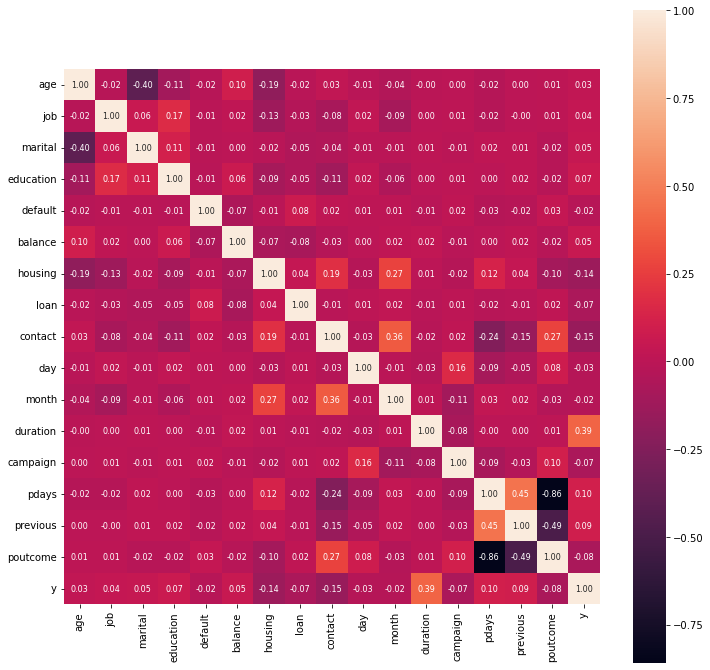

In [ ]:
 plt.figure(figsize =(12, 12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8})

# Data Analysis

# Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale=scaler.fit_transform(train_data)
scale=scaler.fit_transform(test_data)

# Spliting Data

In [ ]:
X_train=train_data.drop(['y'],axis=1)

In [ ]:
y_train=train_data['y']

In [ ]:
X_test=test_data.drop(['y'],axis=1)

In [ ]:
y_test=test_data['y']

# KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
my_params={'n_neighbors':[7,9]}

In [ ]:
knn=KNeighborsClassifier()
grid=GridSearchCV(knn,my_params,cv=5).fit(X_train,y_train)

In [ ]:
orted(grid.cv_results_.keys())
grid_search_results=pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

In [ ]:
grid_search_results

In [ ]:
grid.best_params_

In [ ]:
model=KNeighborsClassifier(n_neighbors = 5, p=1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_scaled,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
randomforestmodel=RandomForestClassifier(n_estimators= 1,
 min_samples_split = 10,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth= 90,
 bootstrap= False)

In [ ]:
randomforestmodel.fit(X_train,y_train)

In [ ]:
y_pred_rf=randomforestmodel.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_classification_rep = classification_report(y_test, y_pred_rf)

In [ ]:
print(f'rf_Accuracy: {rf_accuracy:.2f}')
print('\nrf_Confusion Matrix:')
print(rf_conf_matrix)
print('\nrf_Classification Report:')
print(rf_classification_rep)

# SVM MODEL

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time= 7.5min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time= 7.6min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time= 8.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time= 8.2min


In [ ]:
grid.best_estimator_

In [ ]:
svmmodel = SVC(C=100, gamma=0.1)
svmmodel.fit(X_train, y_train)

In [ ]:
trainingpred =svmmodel.predict(X_train)

In [ ]:
y_pred_svm=svmmodel.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_classification_rep = classification_report(y_test, y_pred_svm)

In [ ]:
print(f'dt_Accuracy: {svm_accuracy:.2f}')
print('\nsvm_Confusion Matrix:')
print(svm_conf_matrix)
print('\nsvm_Classification Report:')
print(svm_classification_rep)

# LOGISTIC CLASSIFIER MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticmodel=LogisticRegression()
logisticmodel.fit(X_train, y_train)

C:\Users\user\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
trainnpredd=logisticmodel.predict(X_train)
y_pred_lm=logisticmodel.predict(X_test)

In [ ]:
lg_accuracy = accuracy_score(y_test, y_pred_lm)
lg_conf_matrix = confusion_matrix(y_test, y_pred_lm)
lg_classification_rep = classification_report(y_test, y_pred_lm)


In [ ]:
print(f'lg_Accuracy: {lg_accuracy:.2f}')
print('\nlg_Confusion Matrix:')
print(lg_conf_matrix)
print('\nlg_Classification Report:')
print(lg_classification_rep)

lg_Accuracy: 0.89

lg_Confusion Matrix:
[[3932   68]
 [ 444   77]]

lg_Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.53      0.15      0.23       521

    accuracy                           0.89      4521
   macro avg       0.71      0.57      0.59      4521
weighted avg       0.86      0.89      0.86      4521

